In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Algerian_forest.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.shape

(246, 14)

In [4]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [6]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [7]:
df.iloc[122:124]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [8]:
df.drop([122,123],inplace=True)

In [9]:
df = df.reset_index()

In [10]:
df.drop('index',axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 26.8+ KB


In [12]:
df[['day','month','year','Temperature','RH','Ws']] = df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [13]:
df.drop([165],inplace=True)

In [14]:
df = df.reset_index()
df.drop('index',axis=1,inplace=True)

In [15]:
df[['Rain','FFMC','DMC','ISI','BUI','FWI']] = df[['Rain','FFMC','DMC','ISI','BUI','FWI']].astype(float)

In [16]:
df['DC'] = df['DC'].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int32(6), object(1)
memory usage: 21.0+ KB


In [18]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [19]:
df['Classes']=[x.strip() for x in df['Classes']]

In [20]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [21]:
df['Classes'] = df['Classes'].map({'not fire':0 , 'fire':1})

In [22]:
df.loc[:123,'region']='0'
df.loc[123:,'region']='1'

In [23]:
df_num = [i for i in df.columns if df[i].dtype !='O']

In [24]:
df_cat =  [i for i in df.columns if df[i].dtype =='O']

In [25]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

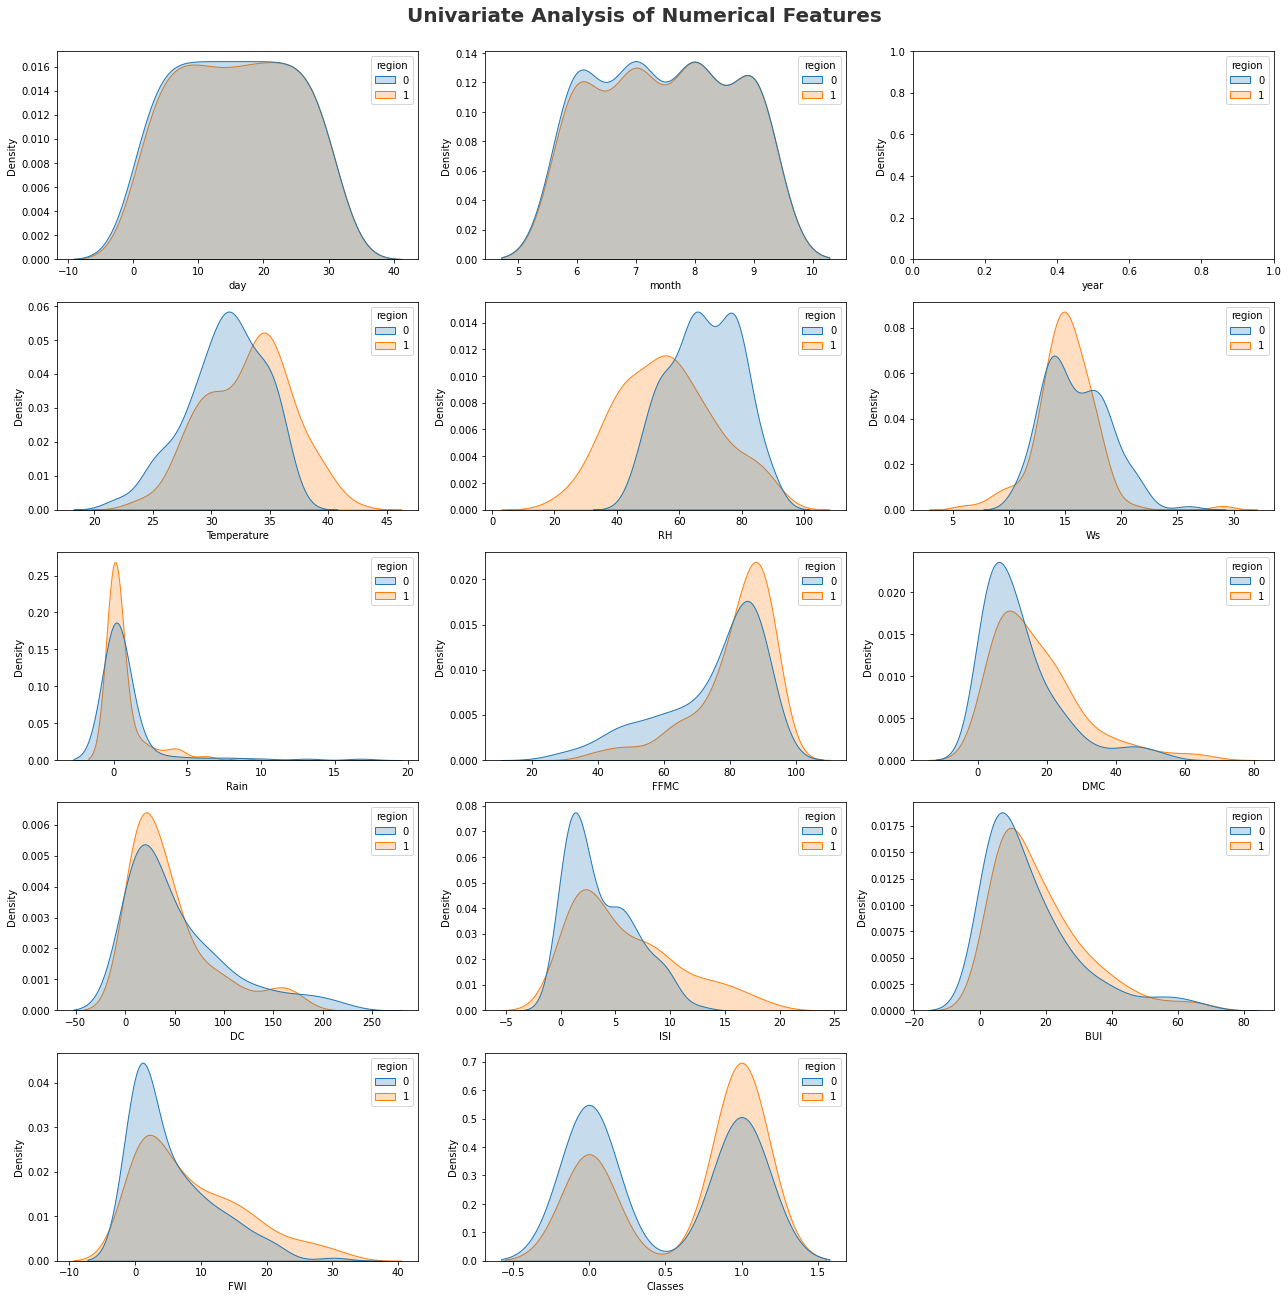

In [26]:
plt.figure(figsize=(18,18))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(df_num)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[df_num[i]],shade=True,hue='region',data=df)
    plt.xlabel(df_num[i])
    plt.tight_layout()

<AxesSubplot:xlabel='region', ylabel='count'>

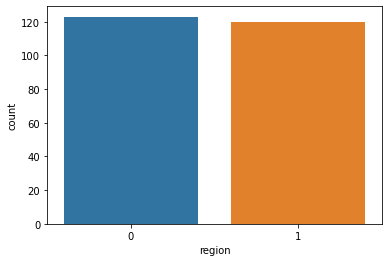

In [27]:
sns.countplot(df['region'])

<AxesSubplot:xlabel='day', ylabel='Temperature'>

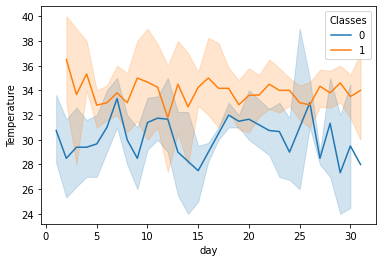

In [28]:
sns.lineplot(x=df['day'],y=df['Temperature'],hue=df['Classes'])

In [29]:
df.groupby(['month'])['Rain'].sum().sort_values()[::-1]

month
9    71.3
6    58.5
8    27.8
7    27.8
Name: Rain, dtype: float64

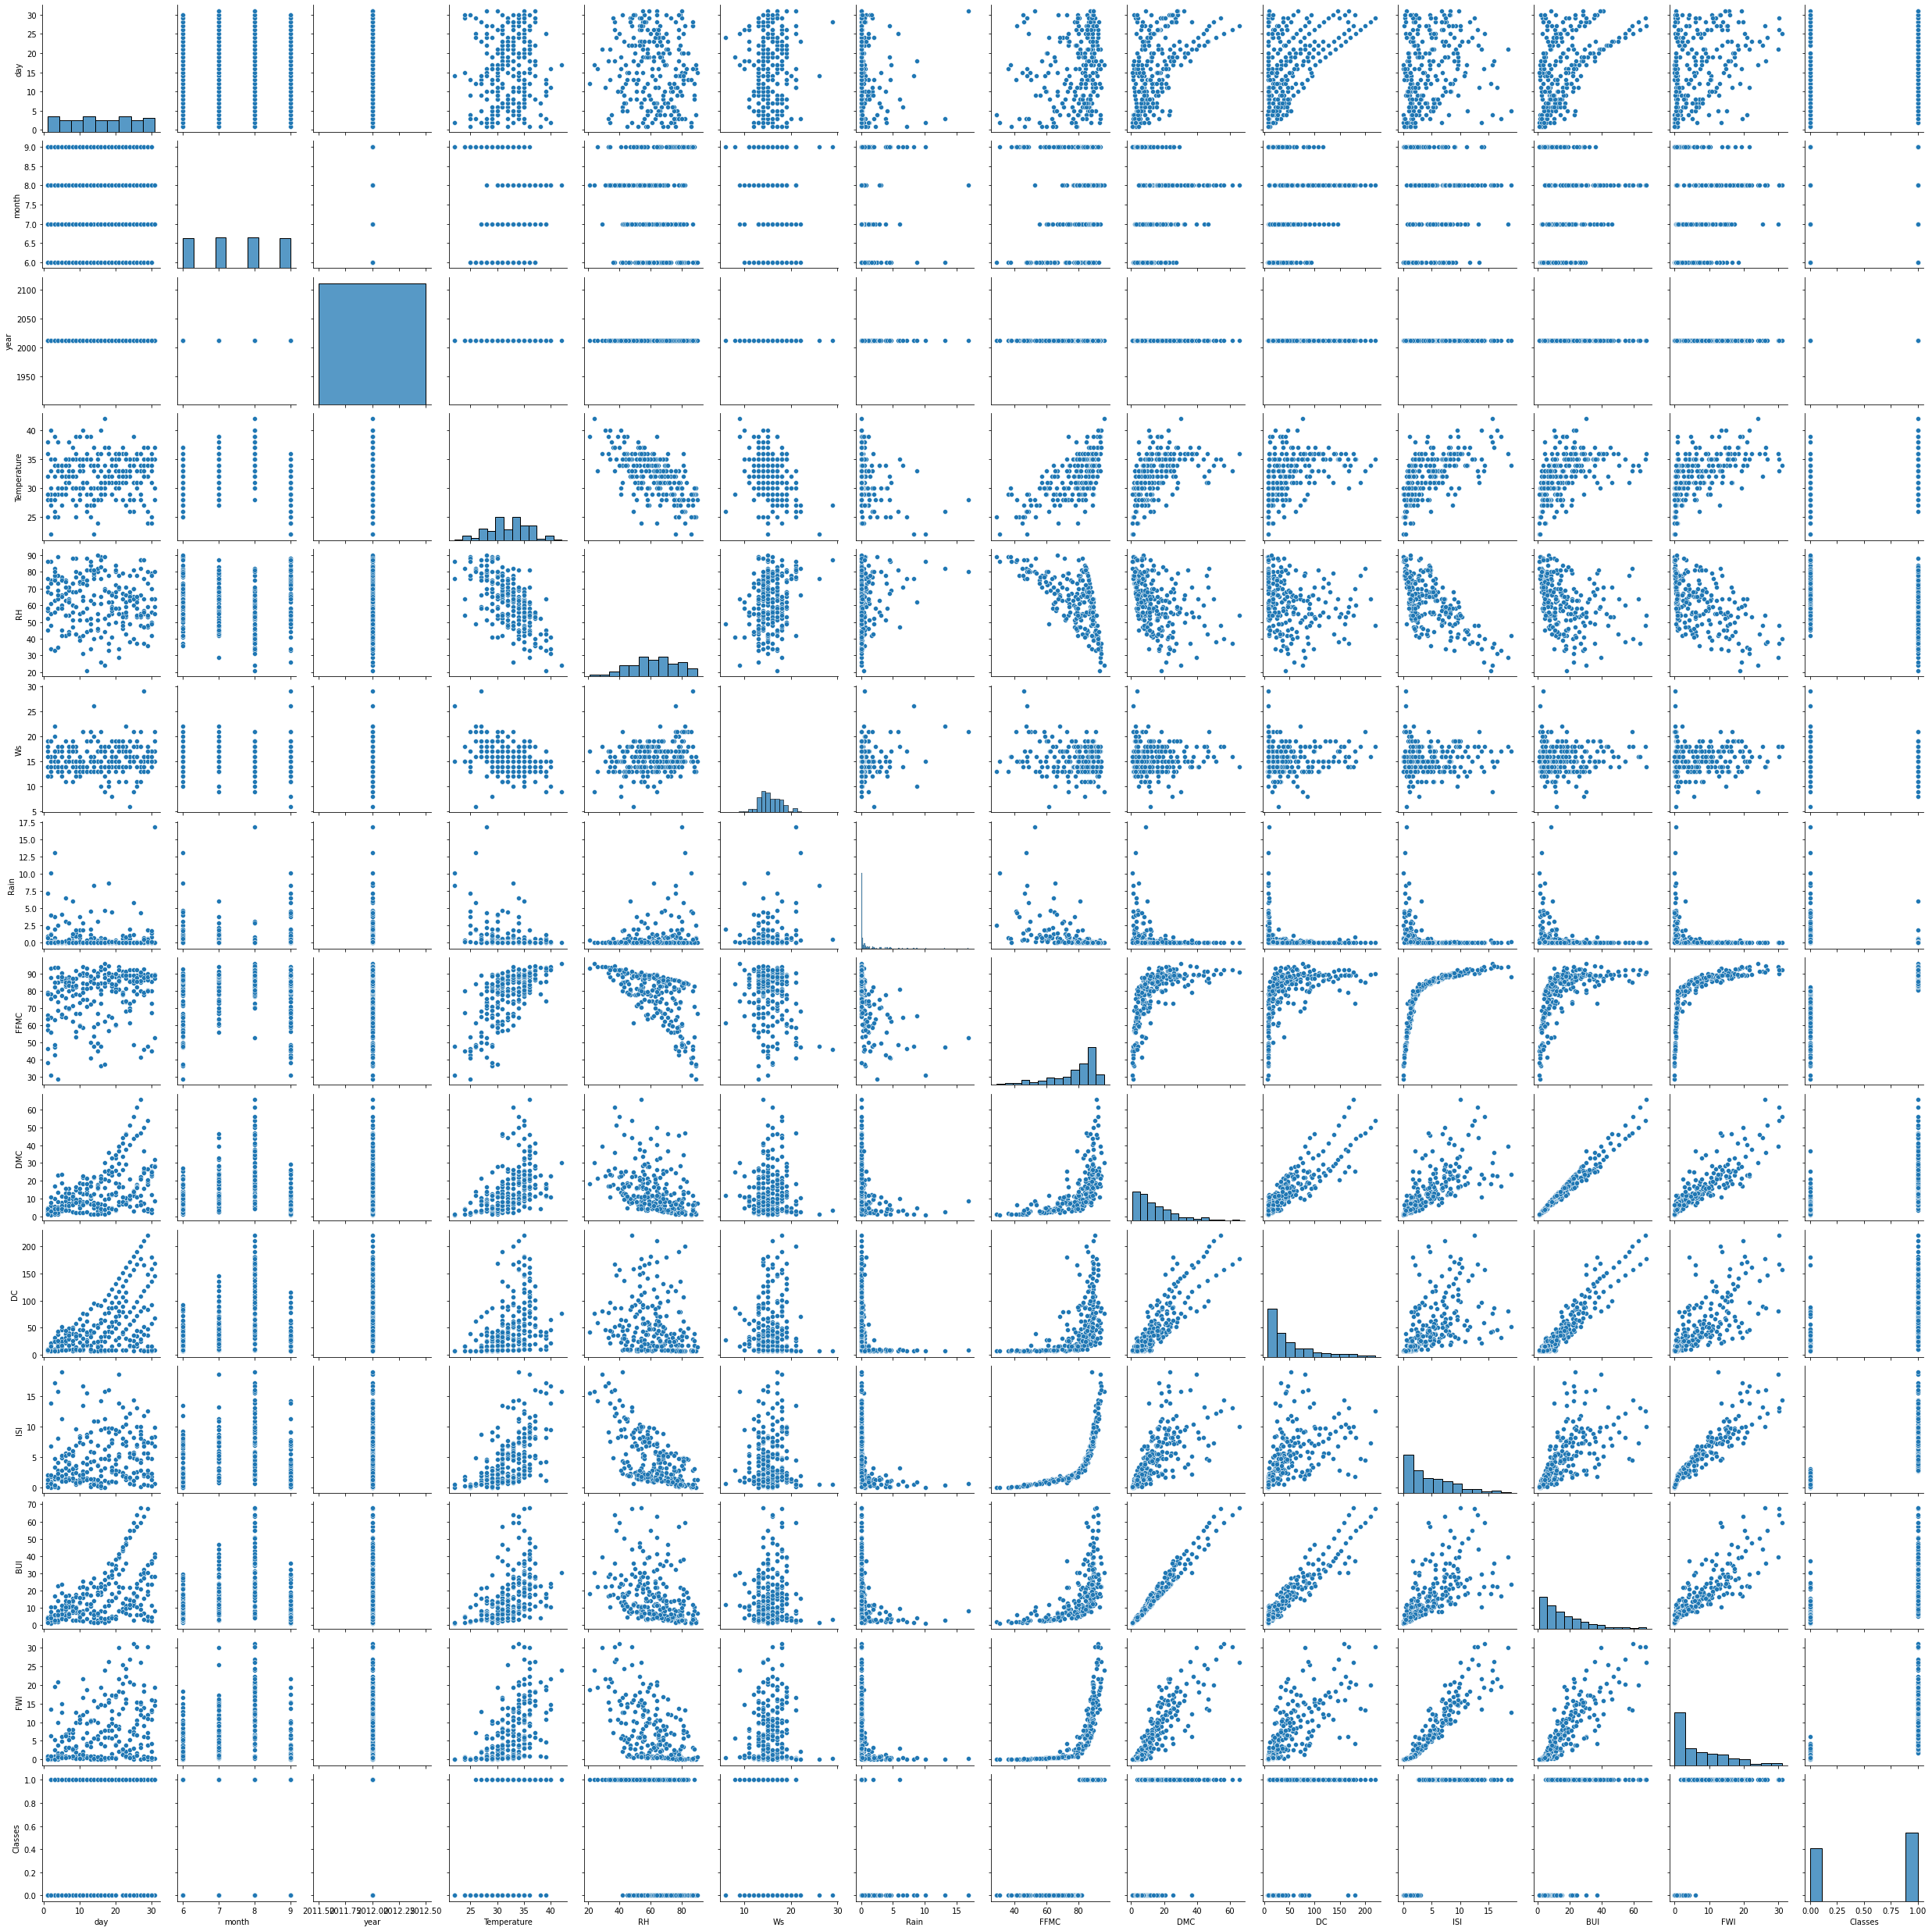

In [30]:
sns.pairplot(df)

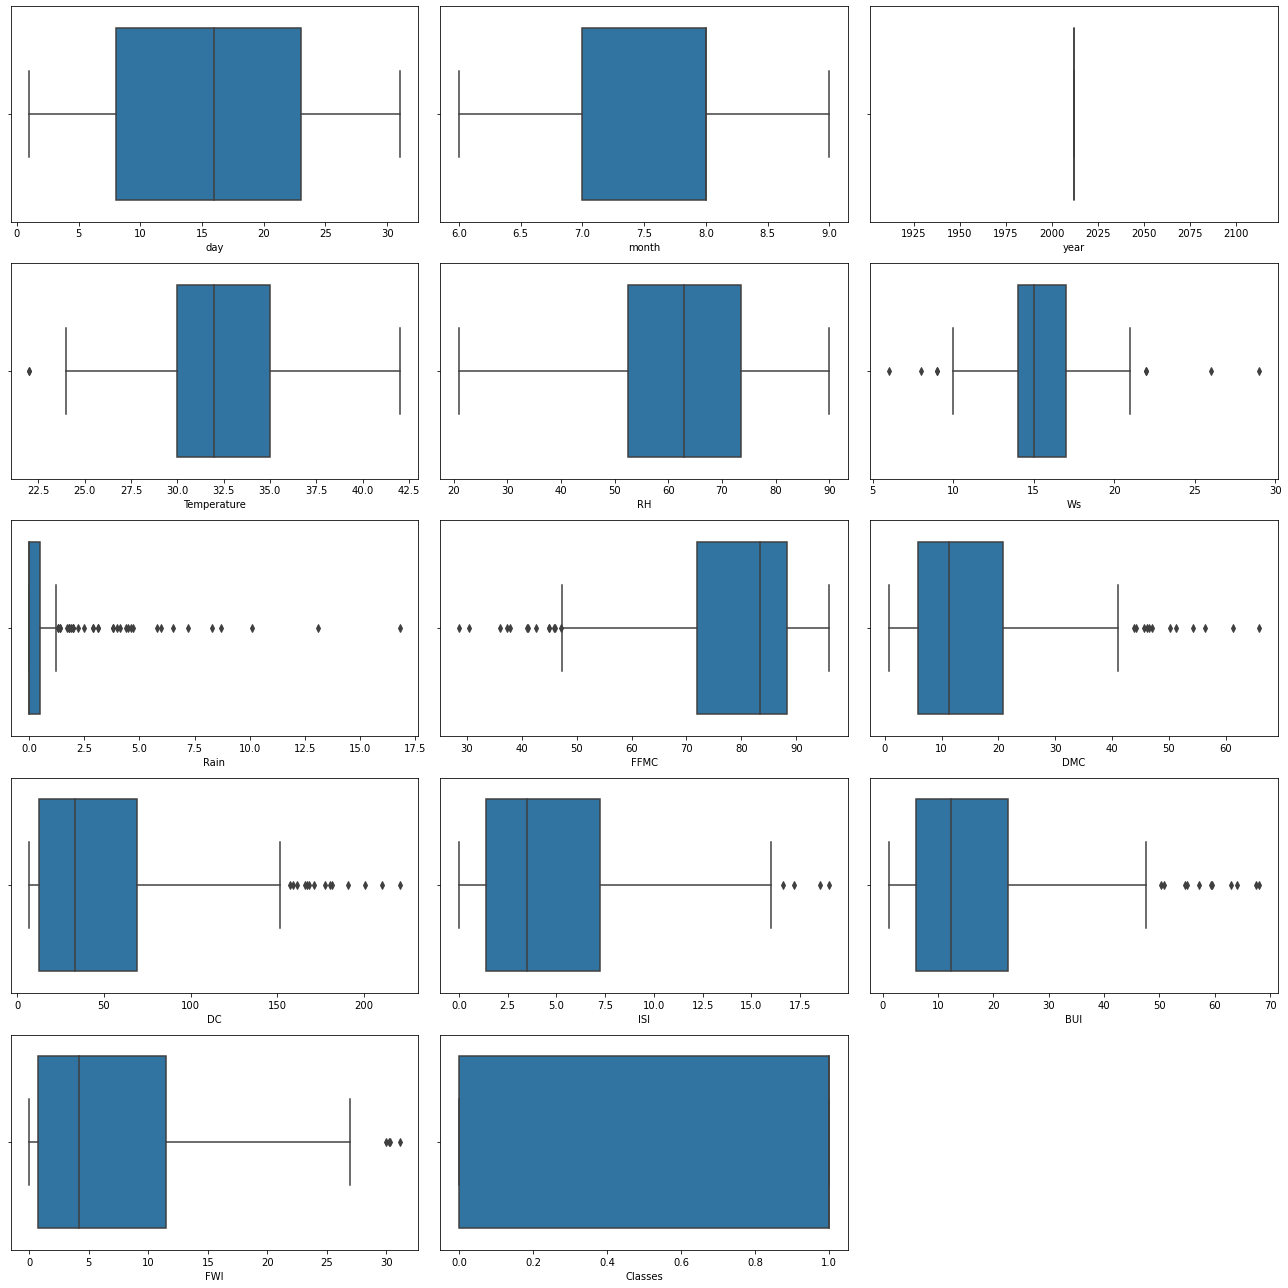

In [31]:
plt.figure(figsize=(18,18))

for i in range(0, len(df_num)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[df_num[i]])
    plt.xlabel(df_num[i])
    plt.tight_layout()

In [32]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [33]:
outlier_thresholds(df,'Ws')

(4.0, 28.0)

In [34]:
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [35]:
replace_with_thresholds(df,df_num)

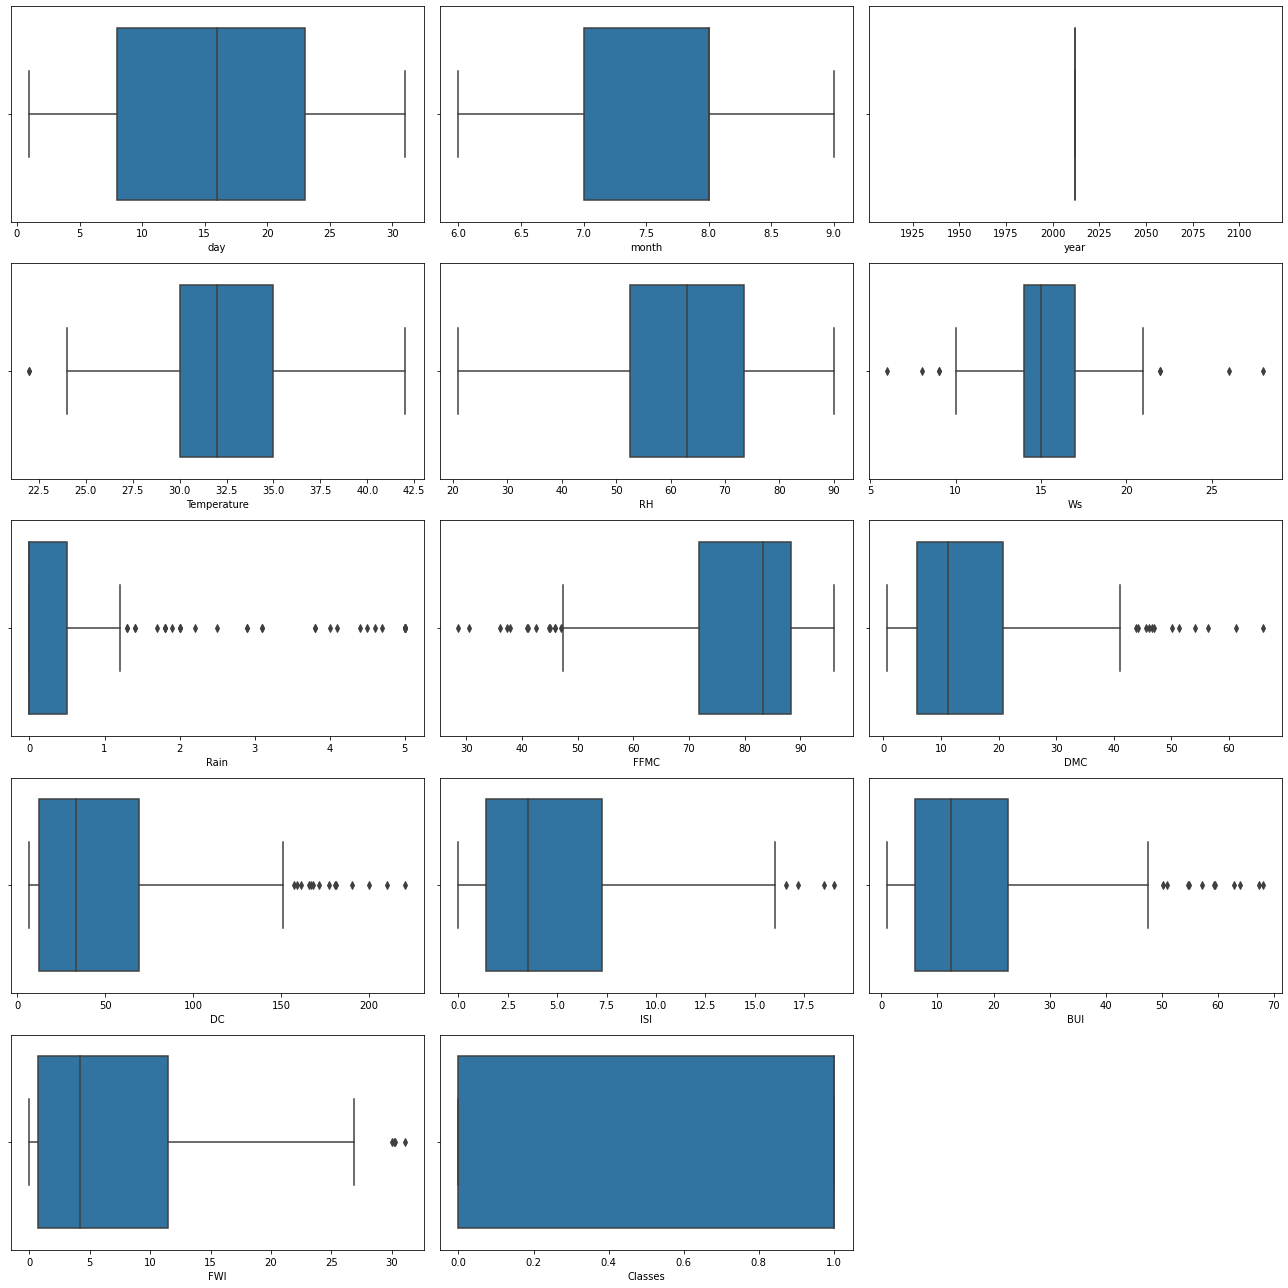

In [36]:
plt.figure(figsize=(18,18))

for i in range(0, len(df_num)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[df_num[i]])
    plt.xlabel(df_num[i])
    plt.tight_layout()

In [37]:
df.skew()

day            0.000365
month         -0.005207
year           0.000000
Temperature   -0.191327
RH            -0.242790
Ws             0.474397
Rain           2.519901
FFMC          -1.320130
DMC            1.522983
DC             1.473460
ISI            1.140243
BUI            1.452745
FWI            1.147593
Classes       -0.258846
region         0.024847
dtype: float64

# Model Training

### For Regression:
    we will take Temperature as dependent variable

In [38]:
df.drop('year', axis=1, inplace=True)

In [39]:
df['Temp']=df['Temperature']

In [40]:
df.drop('Temperature', axis=1, inplace=True)

In [41]:
X=df.iloc[:,:-1]

In [42]:
y=df.iloc[:,-1]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
X_train.shape,y_train.shape

((162, 13), (162,))

In [47]:
X_test.shape,y_test.shape

((81, 13), (81,))

In [48]:
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.18998654,  1.40355772,  1.2199876 , ..., -0.19543585,
         0.90566259,  1.        ],
       [-1.21212815,  0.49039968,  0.1473255 , ..., -0.14405961,
         0.90566259, -1.        ],
       [ 0.26429862, -0.42275835,  0.34844965, ...,  0.24126219,
         0.90566259,  1.        ],
       ...,
       [-1.66641331,  1.40355772,  0.88478069, ..., -0.91470322,
        -1.10416397, -1.        ],
       [ 1.5135828 , -0.42275835, -0.25492278, ...,  0.47245527,
         0.90566259,  1.        ],
       [-0.53070041,  1.40355772,  0.95182207, ..., -0.8890151 ,
        -1.10416397, -1.        ]])

In [49]:
X_test=scaler.transform(X_test)
X_test

array([[ 1.05929765, -1.33591638,  0.08028412, ...,  0.15135377,
         0.90566259, -1.        ],
       [-0.98498557, -1.33591638, -0.59012969, ..., -0.00277495,
         0.90566259, -1.        ],
       [-1.66641331, -0.42275835, -0.32196416, ..., -0.86332698,
        -1.10416397,  1.        ],
       ...,
       [ 1.28644023, -0.42275835, -0.99237797, ...,  1.03759392,
         0.90566259, -1.        ],
       [-1.43927073, -1.33591638,  1.15294622, ..., -0.91470322,
        -1.10416397,  1.        ],
       [ 1.17286894, -1.33591638, -0.05379864, ...,  0.29263843,
         0.90566259,  1.        ]])

In [50]:
### training
from sklearn.linear_model import LinearRegression

In [51]:
regression = LinearRegression()
regression

LinearRegression()

In [52]:
regression.fit(X_train,y_train)

LinearRegression()

In [53]:
print(regression.coef_)     # Co-efficients of independent feature

[-0.4669107  -0.15371042 -1.03602767 -0.71048751  0.57488007  1.86535746
  3.97371308  2.71547441  0.43881359 -5.55097188 -0.40759149 -0.20237698
 -0.18557357]


In [54]:
print(regression.intercept_)    #Intercept of best fit hyper plane

32.098765432098766


In [55]:
# Prediction for the test data
reg_pred = regression.predict(X_test)
reg_pred

array([32.87156698, 35.00499237, 30.69611265, 33.1532847 , 32.0469611 ,
       32.31585466, 31.09675377, 34.76933899, 31.73209683, 31.63020884,
       28.63264328, 40.19818525, 34.35623868, 34.40363564, 34.15152473,
       33.67676681, 33.14057381, 25.13397141, 32.90253807, 34.46282479,
       31.18356748, 28.31215413, 33.68439329, 29.02354261, 36.46967172,
       33.89933257, 33.38803749, 33.6284764 , 26.29420913, 33.3049386 ,
       29.96914585, 32.95425903, 32.31913723, 33.05134941, 32.38917069,
       32.68212685, 31.18058791, 34.26796496, 25.81844362, 21.15013121,
       34.37758085, 33.37544434, 34.53359304, 24.43633642, 36.36451912,
       32.87617148, 30.68818688, 30.94505775, 33.19558066, 28.8934526 ,
       37.17299262, 35.09621185, 33.52321799, 34.69322596, 33.47506977,
       32.37822285, 32.85012403, 32.58245439, 31.69882539, 36.30172373,
       32.98650975, 30.47100211, 28.59722514, 36.71277193, 31.93260823,
       32.32608278, 33.34161632, 34.21374367, 35.13704114, 25.25

### Assumptions

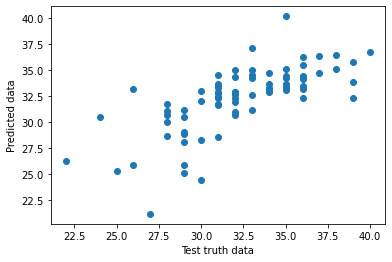

In [56]:
plt.scatter(y_test,reg_pred)            # Linear relationship
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")
plt.show()

In [57]:
residual = y_test - reg_pred
residual.head()

24    -1.871567
6     -2.004992
152   -2.696113
232    0.846715
238   -2.046961
Name: Temp, dtype: float64

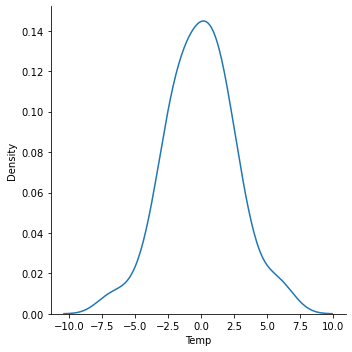

In [58]:
sns.displot(x=residual, kind='kde',)     # normal distribution

Text(0, 0.5, 'Residuals')

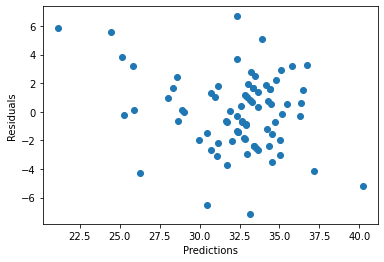

In [59]:
plt.scatter(x=reg_pred, y=residual)    # uniform distribution
plt.xlabel('Predictions')
plt.ylabel('Residuals')

In [60]:
#Performance metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))       # output value should be closer to 1 

6.837451663080832
2.052057117695766
2.6148521302515046


### R Square and Adjusted R sqaure

In [61]:
from sklearn.metrics import r2_score       # R Square method

score = r2_score(y_test,reg_pred) 
print(score)

0.4672400318099694


In [62]:
# Adjusted R2 FORMULA

1 - ((1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.36386869469847094

In [63]:
X = df.loc[:, df.columns!='Temperature']

In [64]:
y = df.loc[:,df.columns=='Temperature']

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()

### Logistic Regression

In [66]:
X = df.loc[:, df.columns!='Classes']

In [67]:
y = df.loc[:,df.columns=='Classes']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [71]:
X_train.shape,y_train.shape

((162, 13), (162, 1))

In [82]:
X_test.shape,y_test.shape

((81, 13), (81, 1))

In [72]:
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.18998654,  1.40355772,  1.2199876 , ..., -0.19543585,
         1.        , -1.12656349],
       [-1.21212815,  0.49039968,  0.1473255 , ..., -0.14405961,
        -1.        ,  0.52256258],
       [ 0.26429862, -0.42275835,  0.34844965, ...,  0.24126219,
         1.        ,  0.24770824],
       ...,
       [-1.66641331,  1.40355772,  0.88478069, ..., -0.91470322,
        -1.        , -1.95112653],
       [ 1.5135828 , -0.42275835, -0.25492278, ...,  0.47245527,
         1.        ,  0.52256258],
       [-0.53070041,  1.40355772,  0.95182207, ..., -0.8890151 ,
        -1.        , -0.5768548 ]])

In [73]:
X_test=scaler.transform(X_test)
X_test

array([[ 1.05929765, -1.33591638,  0.08028412, ...,  0.15135377,
        -1.        , -0.30200045],
       [-0.98498557, -1.33591638, -0.59012969, ..., -0.00277495,
        -1.        ,  0.24770824],
       [-1.66641331, -0.42275835, -0.32196416, ..., -0.86332698,
         1.        , -1.12656349],
       ...,
       [ 1.28644023, -0.42275835, -0.99237797, ...,  1.03759392,
        -1.        ,  1.07227127],
       [-1.43927073, -1.33591638,  1.15294622, ..., -0.91470322,
         1.        , -0.85170914],
       [ 1.17286894, -1.33591638, -0.05379864, ...,  0.29263843,
         1.        ,  1.07227127]])

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
lr = LogisticRegression()

In [76]:
lr

LogisticRegression()

In [77]:
lr.fit(X_train,y_train)

LogisticRegression()

In [78]:
lr.coef_

array([[-0.10999184,  0.08075417,  0.12676451, -0.03460214,  0.22233979,
         2.42591296,  0.05750332,  0.3535173 ,  2.16684427,  0.17158311,
         1.72001681,  0.1455146 ,  0.05465088]])

In [79]:
lr.intercept_

array([1.41004254])

In [80]:
# prediction for the test data
lr_pred = lr.predict(X_test)
lr_pred

array([1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1.])

In [83]:
lr.score(X_test,y_test)

0.9506172839506173

### Performance Matrix3

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score 

In [98]:
#confusion matrix
confusion_mat=confusion_matrix(y_test, lr_pred)
confusion_mat

array([[31,  2],
       [ 2, 46]], dtype=int64)

In [99]:
truly_positive=confusion_mat[0][0]
falsely_positive=confusion_mat[0][1]
falsely_negative=confusion_mat[1][0]
truly_negative=confusion_mat[1][1]

In [96]:
#accuracy
accuracy = accuracy_score(y_test,lr_pred)
accuracy

0.9506172839506173

In [102]:
#precision
precision=round(truly_positive/(truly_positive+falsely_positive),4)
print("Precision of our model is {}".format(precision))

Precision of our model is 0.9394


In [104]:
#recall
recall=round(truly_positive/(truly_positive+falsely_negative),4)
print("Recall of our model is {}".format(recall))

Recall of our model is 0.9394


In [105]:
# F1 score
f1_score=2*(precision*recall)/(precision+recall)
print("F-1 Score of our model is {} ".format(round(f1_score,4)))

F-1 Score of our model is 0.9394 


In [108]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        33
         1.0       0.96      0.96      0.96        48

    accuracy                           0.95        81
   macro avg       0.95      0.95      0.95        81
weighted avg       0.95      0.95      0.95        81



### **ROC and AUC**

In [114]:
# Area Under Curve
auc = roc_auc_score(y_test, lr_pred)
auc

0.9488636363636366

In [115]:
fpr, tpr, thresholds = roc_curve(y_test, lr_pred)

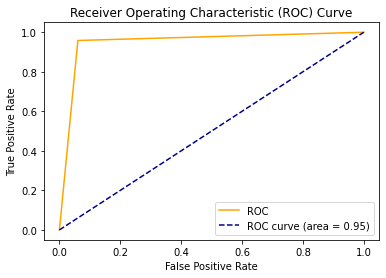

In [116]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()